<a href="https://colab.research.google.com/github/RaghadQadah/DCT-to-an-image/blob/main/1170142DCTActivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output



def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

Original image


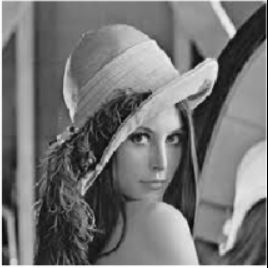

DCT image


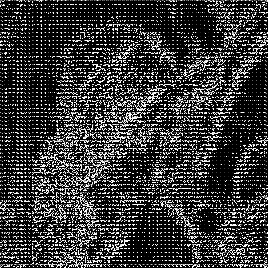

recosntracted image


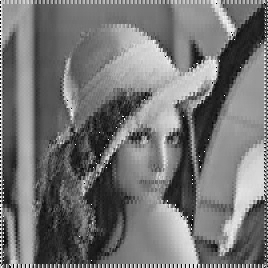

In [33]:
# reading image in grayscale style
img = cv2.imread('drive/My Drive/lena.JPG', cv2.IMREAD_GRAYSCALE)

# defining block size
block_size = 4
k=200

# Quantization Matrix 
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])

# get size of the image
[h , w] = img.shape


height = h
width = w
h = np.float32(h) 
w = np.float32(w) 

nbh = math.ceil(h/block_size)
nbh = np.int32(nbh)

nbw = math.ceil(w/block_size)
nbw = np.int32(nbw)

# get the size of padded image by multiplying block size by number of blocks in height/width

# height of padded image
H =  block_size * nbh

# width of padded image
W =  block_size * nbw

# create a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))
padded_img_DCT = np.zeros((H,W))
padded_img_DCT_Q = np.zeros((H,W))
orig_img = np.zeros((H,W))

padded_img[0:height,0:width] = img[0:height,0:width]

print("Original image")
cv2_imshow(np.uint16(padded_img))

# To each block apply 2D discrete cosine transform
# reorder DCT coefficients in zig-zag order
# reshaped it back to block size by block size (here: 8-by-8)

# initialisation of compressed image
recomp_img = np.zeros((H,W))

#2D-DCT transform
for i in range(nbh):
    
        # Compute start row index of the block
        row_ind_1 = i*block_size
        
        # Compute end row index of the block
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Compute start column index of the block
            col_ind_1 = j*block_size
            
            # Compute end column index of the block
            col_ind_2 = col_ind_1+block_size
            
            # select the current block we want to process using calculated indices
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
            
            # apply 2D discrete cosine transform to the selected block
            # you should use opencv dct function
            DCT = cv2.dct(block)
            
            # reorder DCT coefficients in zig zag order by calling zigzag function
           
           
            reordered = zigzag(DCT)
            
            #Convert the last K coeffcients to zero
            reordered[:-k]=0
            
            
            # reshape the reorderd array back to (block size by block size) (
            reshaped= np.reshape(reordered, (block_size, block_size))
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped



print("DCT image")
cv2_imshow( np.uint8(padded_img))

# inverse 2D-DCT transform
for i in range(nbh):
    
       
        row_ind_1 = i*block_size
        
        # Compute end row index of the block
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Compute start column index of the block
            col_ind_1 = j*block_size
            
            # Compute end column index of the block
            col_ind_2 = col_ind_1+block_size
            
            # select the current block we want to process using calculated indices
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
            
            # apply 2D inverse discrete cosine transform to the selected block
            reordered= cv2.idct(block)
            
            # # reshape the reorderd array back to (block size by block size) 
            reshaped= np.reshape(reordered, (block_size, block_size))
            
            # # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped
print("recosntracted image")
cv2_imshow( np.uint8(padded_img))